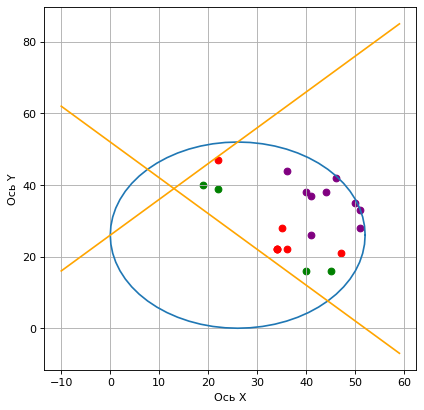

+----+----+----+------+----+
| F1 | F2 | Bi |  Фi  | Ki |
+----+----+----+------+----+
| 34 | 22 | 2  | 0.9  | 2  |
| 36 | 44 | 7  | 0.73 | 3  |
| 51 | 28 | 9  | 0.68 | 3  |
| 34 | 22 | 2  | 0.9  | 2  |
| 22 | 47 | 2  | 0.9  | 2  |
| 41 | 37 | 7  | 0.73 | 3  |
| 47 | 21 | 2  | 0.9  | 2  |
| 41 | 26 | 5  | 0.79 | 3  |
| 34 | 22 | 2  | 0.9  | 2  |
| 22 | 39 | 0  |  1   | 1  |
| 40 | 16 | 0  |  1   | 1  |
| 45 | 16 | 1  | 0.95 | 1  |
| 50 | 35 | 9  | 0.68 | 3  |
| 36 | 22 | 3  | 0.86 | 2  |
| 35 | 28 | 3  | 0.86 | 2  |
| 46 | 42 | 13 | 0.59 | 3  |
| 19 | 40 | 0  |  1   | 1  |
| 40 | 38 | 6  | 0.76 | 3  |
| 44 | 38 | 9  | 0.68 | 3  |
| 51 | 33 | 10 | 0.66 | 3  |
+----+----+----+------+----+


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from prettytable import PrettyTable

N = 20
n = 26

x = np.arange(-10, 60)
y = np.arange(-10, 60)

f2 = x + n
f3 = 2 * n - x

coorsx = []
coorsy = []

while len(coorsx) < N:
    xc = random.randrange(0, n*2)
    yc = random.randrange(0, n*2)

    if xc + yc >= 2 * n:
        if - xc + yc <= n:
            if (xc - n) ** 2 + (yc - n) ** 2 <= n ** 2:
                coorsx.append(xc)
                coorsy.append(yc)

Bi = [0] * N

for i in range(len(coorsx)):
    for j in range(len(coorsx)):
        if (coorsx[j] <= coorsx[i]) & (coorsy[j] <= coorsy[i]):
            Bi[i] += 1
    if Bi[i] > 0:
        Bi[i] -= 1

Фi = [0] * N

for i in range(len(coorsx)):
    Фi[i] = 1 / (1 + Bi[i] / (N - 1))
    if Фi[i] == 1.0:
       Фi[i] = 1
    else:
        Фi[i] = round(Фi[i], 2)

K1 = [0] * N
K2 = [0] * N
K3 = [0] * N
Ki = [0] * N

for i in range(len(coorsx)):
    K1[i] = round(np.abs(Фi[i] - 1), 2)
    K2[i] = round(np.abs(Фi[i] - 0.85), 2)
    K3[i] = round(np.abs(Фi[i] - 0.75), 2)

    if (K1[i] <= K2[i]) & (K1[i] <= K3[i]):
        Ki[i] = 1
    elif (K2[i] <= K1[i]) & (K2[i] <= K3[i]):
        Ki[i] = 2
    else:
        Ki[i] = 3

plt.figure(figsize=(6, 6), dpi=80)
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid()

circle = np.linspace(0, 2 * np.pi, 65)
xcircle = n * np.cos(circle)
ycircle = n * np.sin(circle)
plt.plot(xcircle + n,ycircle + n)

for i in range(len(coorsx)):
    if (Ki[i] == 1):
        plt.scatter(coorsx[i], coorsy[i], color = 'green')
    elif (Ki[i] == 2):
        plt.scatter(coorsx[i], coorsy[i], color = 'red')
    else:
        plt.scatter(coorsx[i], coorsy[i], color = 'purple')

plt.plot(x, f2, color = 'orange')
plt.plot(x, f3, color = 'orange')

plt.show()

newTable = PrettyTable()

newTable.add_column('F1', coorsx) 
newTable.add_column('F2', coorsy) 
newTable.add_column('Bi', Bi) 
newTable.add_column('Фi', Фi)
newTable.add_column('Ki', Ki)
 
print(newTable)